In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from pathlib import Path
import os

BASE_DIR = str(Path(os.path.abspath('')).parent)

import sys
sys.path.insert(0, BASE_DIR)
sys.path.insert(0, BASE_DIR + '/src')



In [8]:
data = pd.read_csv('../data/fake_job_postings.csv', encoding='utf-8')

In [14]:
import dataframe_image as dfi
dfi.export(data.iloc[], "table.png")

d:\vscode\BigDataAnalysis-HYU-IE\.venv\lib\site-packages\PIL\Image.py:3176: DecompressionBombWarning: Image size (108969300 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [6]:
data.shape

(17880, 18)

# 각 column의 type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

9, 10, 11 : binary

# 결측치 처리

In [85]:
data.isnull().sum().sort_values(ascending = False)

salary_range           15012
department             11547
required_education      8105
benefits                7210
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2695
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

텍스트 컬럼 결측행 제거

In [86]:
rdata = data[ -data.description.isnull() & -data.requirements.isnull() & -data.company_profile.isnull()]

rdata.shape

(12631, 18)

In [88]:
rdata.isnull().sum().sort_values(ascending = False)

salary_range           10638
department              7737
required_education      4698
required_experience     4061
benefits                3785
function                3614
industry                2683
employment_type         1853
location                 129
job_id                     0
has_questions              0
telecommuting              0
has_company_logo           0
title                      0
requirements               0
description                0
company_profile            0
fraudulent                 0
dtype: int64

결측치 많은 컬럼, index 컬럼 제거

In [89]:
cdata = rdata.drop(['salary_range', 'department', 'job_id', 'title'], axis = 1)
cdata.shape

(12631, 14)

In [90]:
cdata.isnull().sum().sort_values(ascending = False)

required_education     4698
required_experience    4061
benefits               3785
function               3614
industry               2683
employment_type        1853
location                129
company_profile           0
description               0
requirements              0
telecommuting             0
has_company_logo          0
has_questions             0
fraudulent                0
dtype: int64

결측치 대체

In [98]:
DATA = cdata

for col in DATA.columns:
  if (DATA[col].dtype == 'object') and (DATA[col].isnull().sum() != 0):
    cat = DATA[col].unique()
    print('{}: {}'.format(col, len(cat)))

location: 2186
benefits: 4877
employment_type: 6
required_experience: 8
required_education: 14
industry: 129
function: 38


일단 결측치 다 'None'로 대체함

In [99]:
for col in DATA.columns:
  if DATA[col].isnull().sum() != 0:
    DATA.loc[DATA[col].isnull(), col] = 'None'

In [103]:
print(DATA.shape)
print(DATA.isnull().sum())

(12631, 14)
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


# EDA

In [104]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12631 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   location             12631 non-null  object
 1   company_profile      12631 non-null  object
 2   description          12631 non-null  object
 3   requirements         12631 non-null  object
 4   benefits             12631 non-null  object
 5   telecommuting        12631 non-null  int64 
 6   has_company_logo     12631 non-null  int64 
 7   has_questions        12631 non-null  int64 
 8   employment_type      12631 non-null  object
 9   required_experience  12631 non-null  object
 10  required_education   12631 non-null  object
 11  industry             12631 non-null  object
 12  function             12631 non-null  object
 13  fraudulent           12631 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.4+ MB


1,2,3,4: 텍스트

5,6,7: binary

8,9,10,11,12: 범주형



target variable

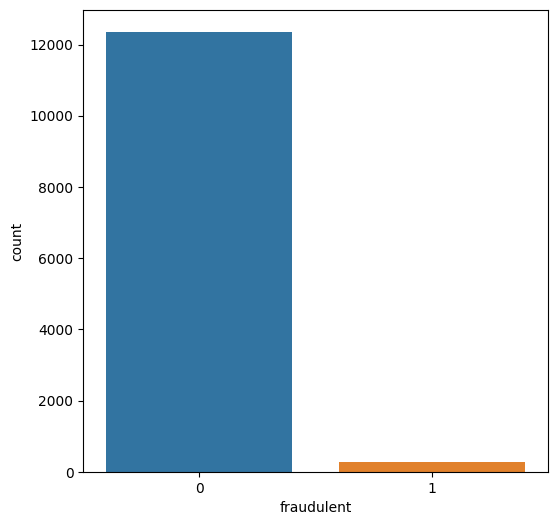

In [117]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='fraudulent', data = DATA)
plt.show()

In [110]:
print((DATA['fraudulent'] == 0).sum())
print((DATA['fraudulent'] == 1).sum())

12359
272


binary data

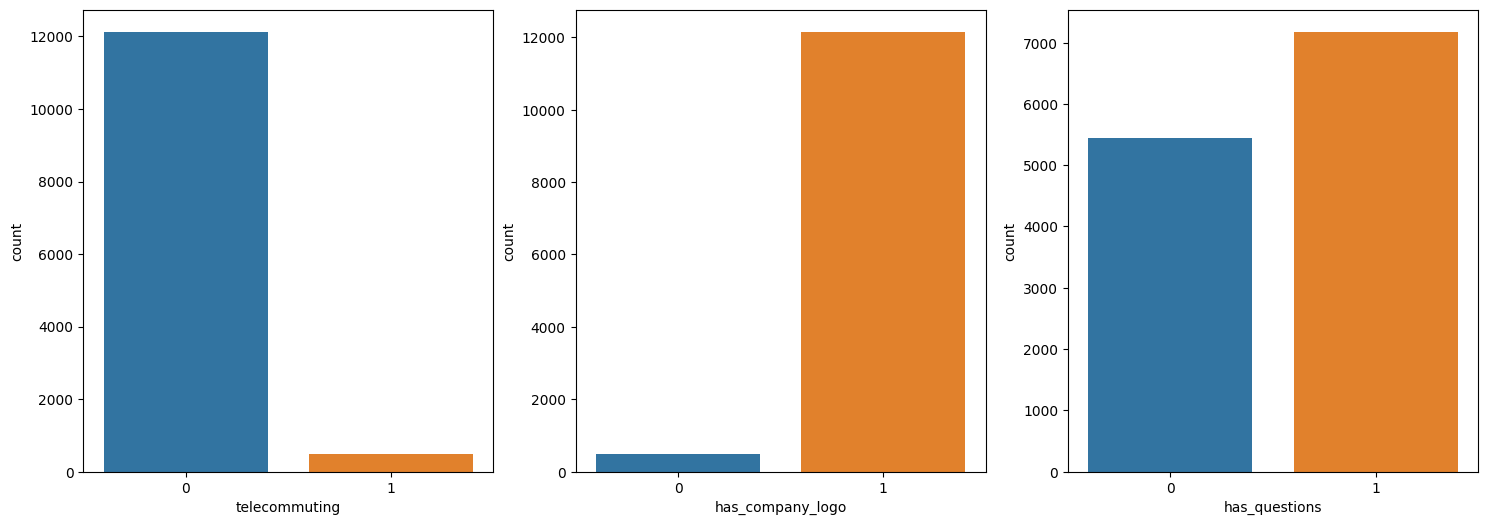

In [116]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))
sns.countplot(x='telecommuting', data = DATA, ax=ax[0])
sns.countplot(x='has_company_logo', data = DATA, ax=ax[1])
sns.countplot(x='has_questions', data = DATA, ax=ax[2])
plt.show()

In [118]:
print((DATA['telecommuting'] == 0).sum())
print((DATA['telecommuting'] == 1).sum())
print((DATA['has_company_logo'] == 0).sum())
print((DATA['has_company_logo'] == 1).sum())
print((DATA['has_questions'] == 0).sum())
print((DATA['has_questions'] == 1).sum())

12135
496
475
12156
5451
7180


categorical data

In [136]:
def cat_plot(col, data, figsize):
  fig, ax = plt.subplots(1,1, figsize=figsize)
  sns.countplot(x=col, data=data)
  plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
  plt.show()

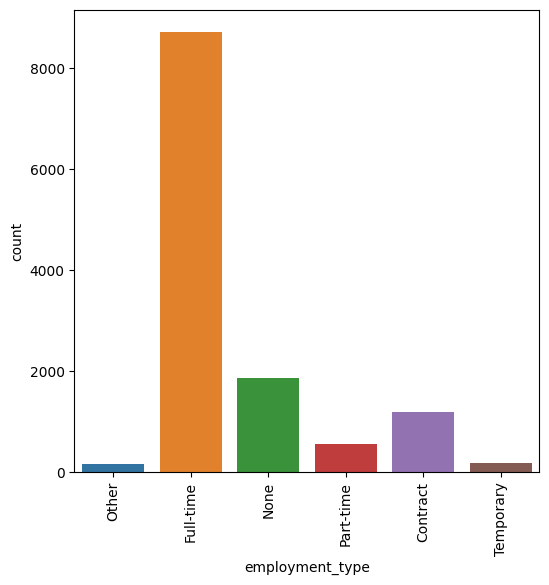

In [137]:
cat_plot('employment_type', DATA, (6,6))

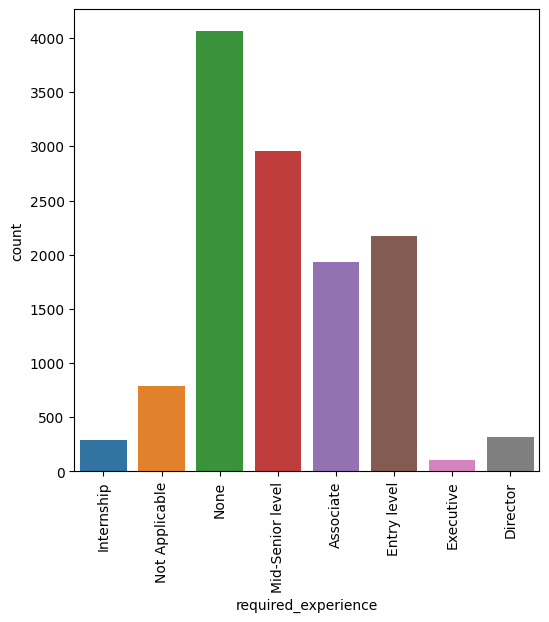

In [149]:
cat_plot('required_experience', DATA,(6,6))

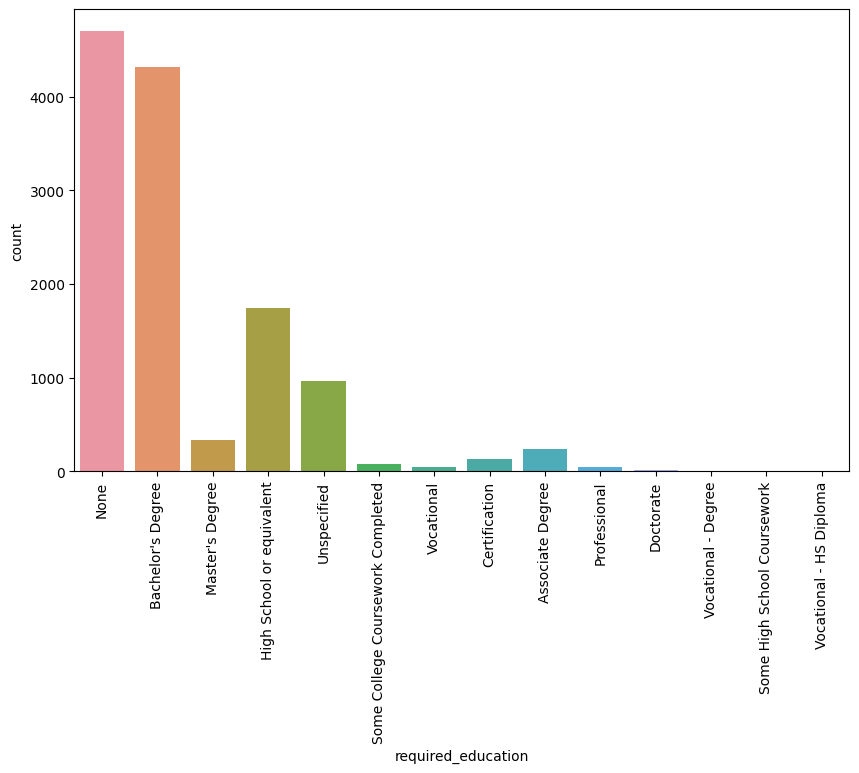

In [140]:
cat_plot('required_education', DATA, (10,6))

required_educaion에서 같은걸 다르게 표현한게 있는거 같아서 나중에 수정할 필요 있을듯

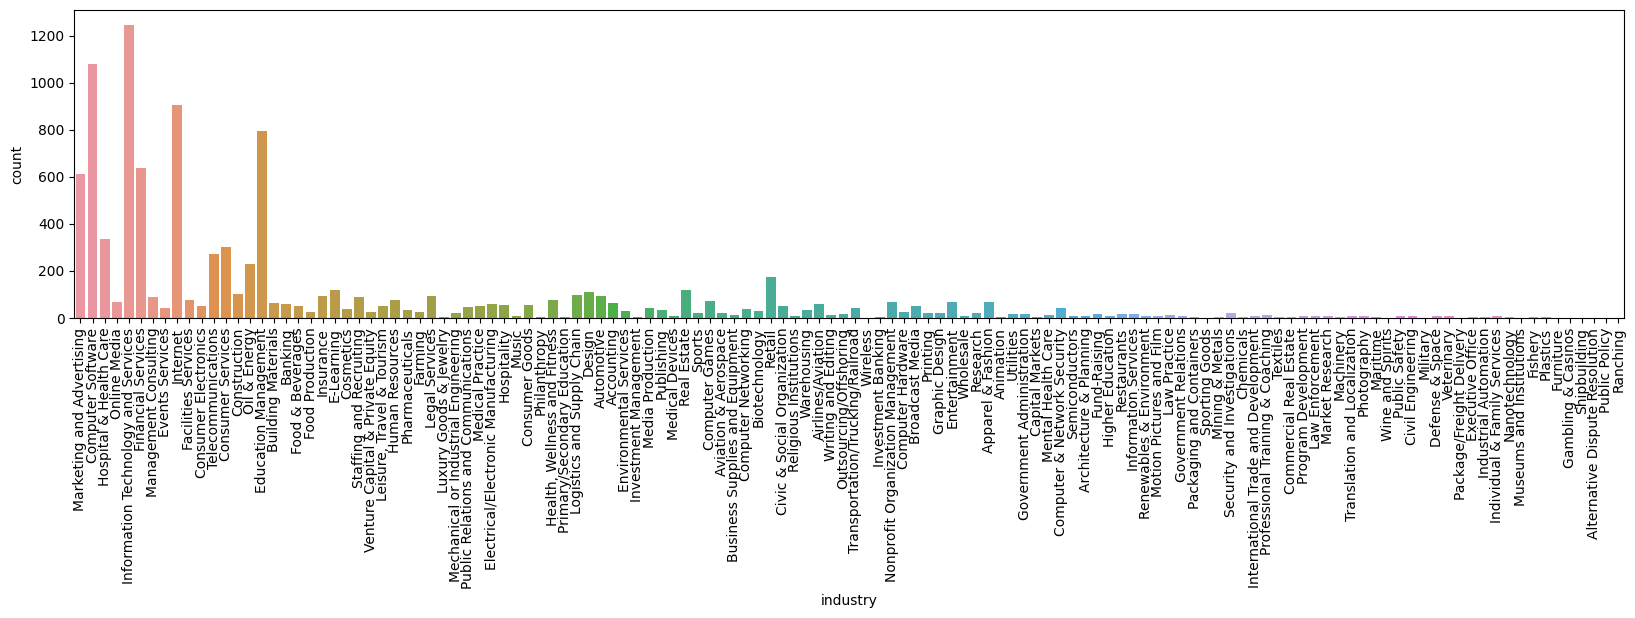

In [147]:
cat_plot('industry', rdata,(20,4))

12000개중에 129개라 일단 범주로 넣었는데 이거도 나중에 다시 수정해야할듯

내일 발표에는 빼는게 나을듯..?



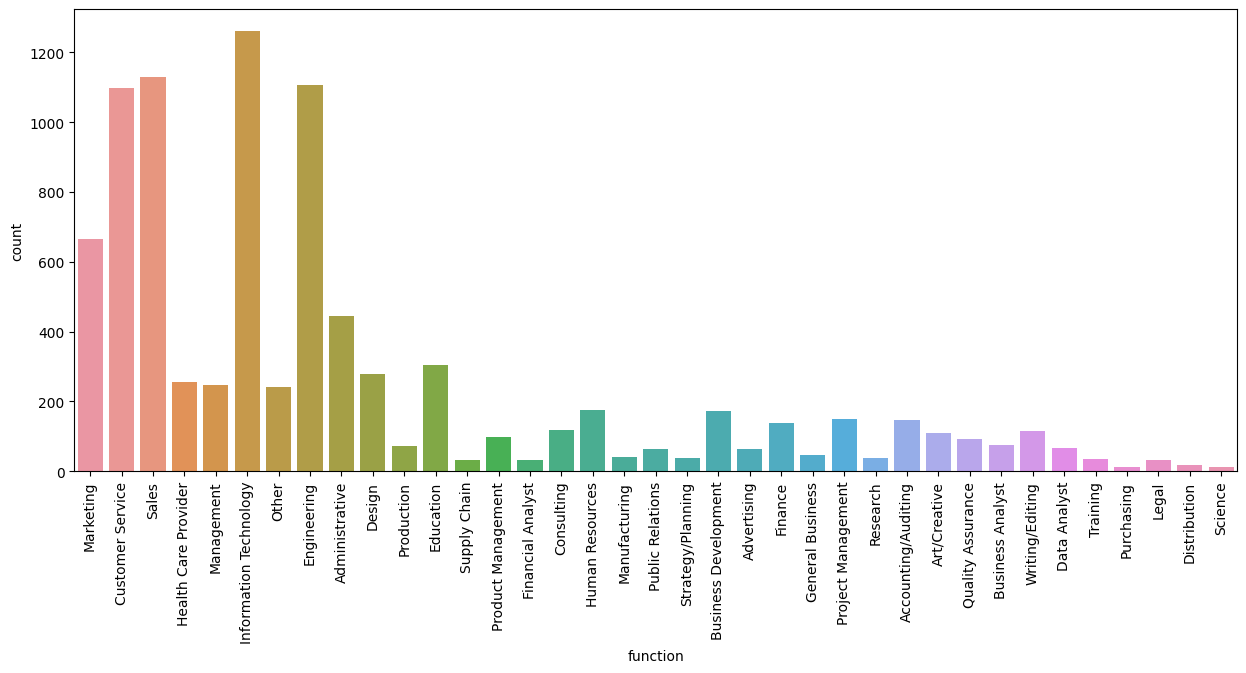

In [148]:
cat_plot('function', rdata,(15,6))

상관분석

In [166]:
catdata = DATA.iloc[:,8:14]
catdata.shape

(12631, 6)

In [167]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
catdata_encoded = pd.DataFrame()

for col in catdata.columns:
  catdata_encoded[col] = label.fit_transform(catdata[col])

catdata_encoded.head()

,employment_type,required_experience,required_education,industry,function,fraudulent
0,3,4,6,85,22,0
1,1,7,6,73,7,0
2,2,6,6,85,23,0
3,1,5,1,22,32,0
4,1,5,1,51,16,0


In [168]:
from scipy.stats import chi2_contingency

def cramers_V(var1, var2):
  crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  return (stat/(obs*mini))

In [169]:
rows = []

for var1 in catdata_encoded:
  col = []
  for var2 in catdata_encoded:
    cramers = cramers_V(catdata_encoded[var1], catdata_encoded[var2])
    col.append(round(cramers, 4))
  rows.append(col)

cramers_result = np.array(rows)
cramer_matrix = pd.DataFrame(cramers_result, columns = catdata_encoded.columns, index = catdata_encoded.columns)

In [170]:
cramer_matrix

,employment_type,required_experience,required_education,industry,function,fraudulent
employment_type,1.0000,0.0904,0.0661,0.2592,0.1024,0.0028
required_experience,0.0904,1.0000,0.0914,0.1153,0.1036,0.0046
required_education,0.0661,0.0914,1.0000,0.0865,0.0555,0.0189
industry,0.2592,0.1153,0.0865,1.0000,0.1101,0.1002
function,0.1024,0.1036,0.0555,0.1101,1.0000,0.0291
fraudulent,0.0028,0.0046,0.0189,0.1002,0.0291,0.9962


<ipython-input-171-4d3920108540>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(cramer_matrix, dtype = np.bool)


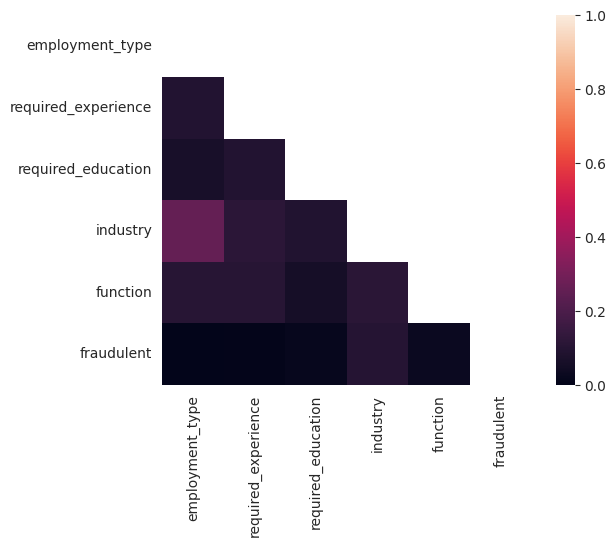

In [171]:
mask = np.zeros_like(cramer_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
  ax = sns.heatmap(cramer_matrix, mask=mask, vmin=0, vmax=1, square=True)

plt.show()